Q.6 STATISTICS-A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.

Ans:Yes the change in blood pressure follows a normal distribution.Please refer the below code and the plot.

In [1]:
import pandas as pd

In [44]:
##Removing the header
check = pd.read_csv('data.csv', skiprows=1)

In [46]:
##Creating customised header 
headers = ['ID', 'BPB', 'BPA']
check = check.set_axis(headers, axis=1)

In [48]:
##Creating a column for difference
check['Difference'] = check['BPA'] -check['BPB']

In [49]:
check.head()

,ID,BPB,BPA,Difference
0,2,142,135,-7
1,3,120,118,-2
2,4,135,127,-8
3,5,148,140,-8
4,6,122,118,-4


In [50]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

<AxesSubplot:xlabel='Difference', ylabel='Count'>

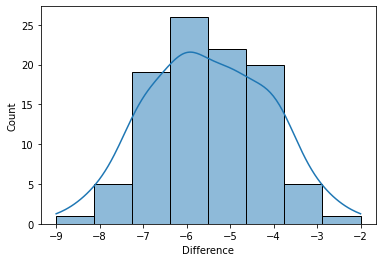

In [55]:
sns.histplot(data=check, x='Difference',kde=1)

PYTHON

Q.1.
Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word. 

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Tag the words with their part-of-speech (POS) labels
    tagged_words = pos_tag(words)

    # Initialize counts
    counts = {
        'verbs': 0,
        'nouns': 0,
        'pronouns': 0,
        'adjectives': 0
    }

    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('VB'):  # Verbs
            counts['verbs'] += 1
        elif tag.startswith('NN'):  # Nouns
            counts['nouns'] += 1
        elif tag == 'PRP' or tag == 'PRP$':  # Pronouns
            counts['pronouns'] += 1
        elif tag.startswith('JJ'):  # Adjectives
            counts['adjectives'] += 1

    return counts



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [5]:
#Use case:1
text = "She sells seashells by the seashore."
counts = count_pos_tags(text)
print(counts)

{'verbs': 1, 'nouns': 2, 'pronouns': 1, 'adjectives': 0}


Explanation:In this test case, the given text contains one verb,two nouns, one pronoun and zero adjective. The program correctly identifies and counts these parts of speech, returning the respective counts in the dictionary.

In [6]:
#Use case:2
text = "The cat is sitting on the mat."
counts = count_pos_tags(text)
print(counts)

{'verbs': 2, 'nouns': 2, 'pronouns': 0, 'adjectives': 0}


Explanation:In this test case, the given text contains one verb, two nouns. There are no pronouns and adjectives present in this text. The program accurately counts and returns the number of verbs, nouns, pronouns, and adjectives in the provided dictionary.

Q.2.Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if we can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO

In [7]:
def is_valid_string(s):
    # Create a frequency dictionary to count the occurrences of each character
    frequency = {}
    for char in s:
        frequency[char] = frequency.get(char, 0) + 1

    # Create a frequency dictionary to count the occurrences of each frequency count
    count_frequency = {}
    for count in frequency.values():
        count_frequency[count] = count_frequency.get(count, 0) + 1

    # If all characters have the same count, it is a valid string
    if len(count_frequency) == 1:
        return "YES"

    # If there are exactly two different counts
    if len(count_frequency) == 2:
        # Get the counts and frequencies
        counts = list(count_frequency.keys())
        freqs = list(count_frequency.values())

        # Check if removing one character at index makes it a valid string
        if freqs.count(1) == 1 and (freqs.count(counts[0]) == 1 or freqs.count(counts[1]) == 1):
            if (counts[0] == 1 and freqs[0] == 1) or (counts[1] == 1 and freqs[1] == 1) or abs(counts[0] - counts[1]) == 1:
                return "YES"

    # Otherwise, it is not a valid string
    return "NO"


In [10]:
#Use case1:
string1 = "abccdde"  
print(is_valid_string(string6)) 


NO


Explanation:In this test case, the given string has the following character counts: {'a': 1, 'b': 1, 'c': 2, 'd': 2, 'e': 1}. After removing one 'e' from the string, the remaining characters do not occur the same number of times.Therefore, the string is considered invalid, and the function returns "No".

In [12]:
#Use case2:
string2 = "aabbccdd"  
print(is_valid_string(string2)) 

YES


Explanation:This is a valid string because frequencies are { “a”: 2, “b”: 2, “c”: 2 }


Q.3.Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.Link:https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

In [13]:
import requests
import pandas as pd

def download_pokemon_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided URL.")

def convert_to_excel(data):
    df = pd.json_normalize(data, 'pokemon')
    excel_file = "pokedex.xlsx"
    df.to_excel(excel_file, index=False)
    return excel_file

# Download the data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
pokemon_data = download_pokemon_data(url)

# Convert and save the data as an Excel file
excel_file_path = convert_to_excel(pokemon_data)
print("Data successfully converted and saved as:", excel_file_path)


Data successfully converted and saved as: pokedex.xlsx


Q.4.Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json

In [18]:
import requests
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided URL.")

def convert_to_csv(data, filename):
    fieldnames = set(field for entry in data for field in entry.keys())
    fieldnames = [field for field in fieldnames if ":" not in field and "@" not in field]
    
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for entry in data:
            cleaned_entry = {field: entry.get(field) for field in fieldnames}
            writer.writerow(cleaned_entry)
    
    return filename

# Download the data
url = "https://data.nasa.gov/resource/y77d-th95.json"
nasa_data = download_data(url)

# Convert and save the data as a CSV file
csv_filename = "nasa_data.csv"
csv_file_path = convert_to_csv(nasa_data, csv_filename)
print("Data successfully converted and saved as:", csv_file_path)





Data successfully converted and saved as: nasa_data.csv


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

In [20]:
import requests
import json

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data from the provided API.")

def extract_data(data):
    show_id = data['id']
    show_url = data['url']
    show_name = data['name']
    episodes = data['_embedded']['episodes']
    
    extracted_data = []
    for episode in episodes:
        episode_id = episode['id']
        episode_season = episode['season']
        episode_number = episode['number']
        episode_type = episode['type']
        episode_airdate = episode['airdate']
        episode_airtime = episode['airtime']
        episode_runtime = episode['runtime']
        episode_rating = episode['rating']['average']
        episode_summary = episode['summary'].strip('<p>').strip('</p>')
        episode_image_medium = episode['image']['medium']
        episode_image_original = episode['image']['original']
        
        episode_data = {
            'episode_id': episode_id,
            'episode_season': episode_season,
            'episode_number': episode_number,
            'episode_type': episode_type,
            'episode_airdate': episode_airdate,
            'episode_airtime': episode_airtime,
            'episode_runtime': episode_runtime,
            'episode_rating': episode_rating,
            'episode_summary': episode_summary,
            'episode_image_medium': episode_image_medium,
            'episode_image_original': episode_image_original
        }
        
        extracted_data.append(episode_data)
    
    return show_id, show_url, show_name, extracted_data

# Download the data
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
show_data = download_data(api_url)

# Extract the required data
show_id, show_url, show_name, episodes_data = extract_data(show_data)

# Print the extracted data with proper formatting
print("Show ID:", show_id)
print("Show URL:", show_url)
print("Show Name:", show_name)

print("\nEpisodes:")
for episode_data in episodes_data:
    print(json.dumps(episode_data, indent=4))
    print('-' * 50)


Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld

Episodes:
{
    "episode_id": 869671,
    "episode_season": 1,
    "episode_number": 1,
    "episode_type": "regular",
    "episode_airdate": "2016-10-02",
    "episode_airtime": "21:00",
    "episode_runtime": 68,
    "episode_rating": 8,
    "episode_summary": "A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.",
    "episode_image_medium": "https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg",
    "episode_image_original": "https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg"
}
--------------------------------------------------
{
    "episode_id": 911201,
    "episode_season": 1,
    "epi

Q.6.Use the data Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

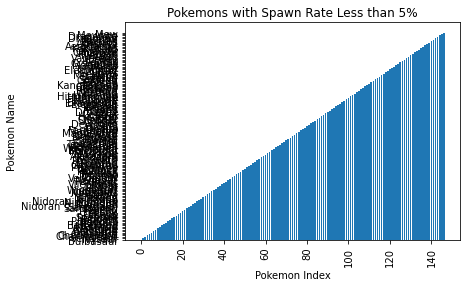

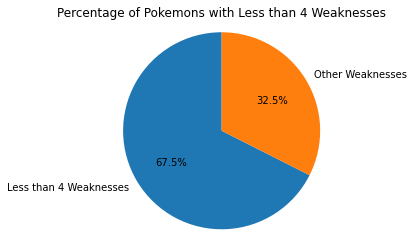

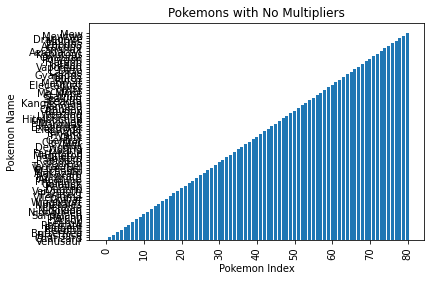

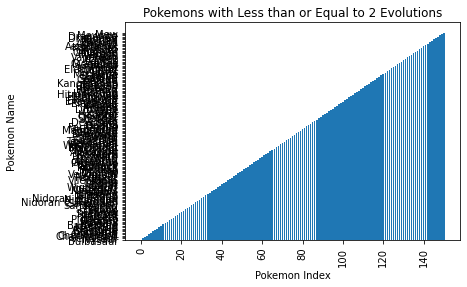

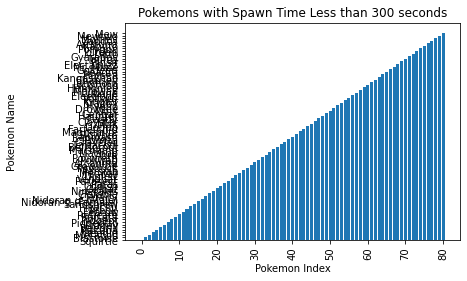

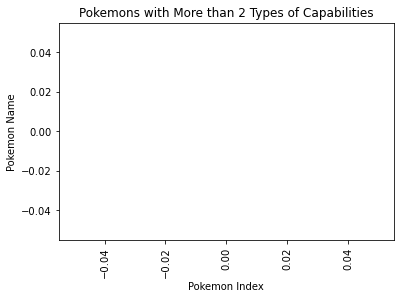

In [28]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Download the data from the URL
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Create lists to store the extracted data
names = []
spawn_rate_less_than_5 = []
less_than_4_weaknesses = []
no_multipliers = []
less_than_2_evolutions = []
spawn_time_less_than_300 = []
more_than_2_capabilities = []

# Extract data from the JSON
for pokemon in data["pokemon"]:
    names.append(pokemon["name"])
    
    spawn_rate = pokemon.get("spawn_chance", 0)
    if spawn_rate < 5:
        spawn_rate_less_than_5.append(pokemon["name"])
    
    weaknesses = pokemon.get("weaknesses", [])
    if len(weaknesses) < 4:
        less_than_4_weaknesses.append(pokemon["name"])
    
    multipliers = pokemon.get("multipliers", [])
    if not multipliers:
        no_multipliers.append(pokemon["name"])
    
    evolutions = pokemon.get("evolutions", [])
    if len(evolutions) <= 2:
        less_than_2_evolutions.append(pokemon["name"])
    
    spawn_time = pokemon.get("spawn_time", "N/A")
    if spawn_time == "N/A":
        spawn_time_seconds = 0
    else:
        minutes, seconds = map(int, spawn_time.split(":"))
        spawn_time_seconds = minutes * 60 + seconds
    if spawn_time_seconds < 300:
        spawn_time_less_than_300.append(pokemon["name"])
    
    types = pokemon.get("type", [])
    if len(types) > 2:
        more_than_2_capabilities.append(pokemon["name"])

# Plot 1: Bar plot for Pokemons with spawn rate less than 5%
plt.bar(range(len(spawn_rate_less_than_5)), spawn_rate_less_than_5)
plt.xlabel("Pokemon Index")
plt.ylabel("Pokemon Name")
plt.title("Pokemons with Spawn Rate Less than 5%")
plt.xticks(rotation=90)
plt.show()

# Plot 2: Pie chart for Pokemons with less than 4 weaknesses
labels = ["Less than 4 Weaknesses", "Other Weaknesses"]
sizes = [len(less_than_4_weaknesses), len(names) - len(less_than_4_weaknesses)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Pokemons with Less than 4 Weaknesses")
plt.axis('equal')
plt.show()

# Plot 3: Bar plot for Pokemons with no multipliers
plt.bar(range(len(no_multipliers)), no_multipliers)
plt.xlabel("Pokemon Index")
plt.ylabel("Pokemon Name")
plt.title("Pokemons with No Multipliers")
plt.xticks(rotation=90)
plt.show()

# Plot 4: Bar plot for Pokemons with less than or equal to 2 evolutions
plt.bar(range(len(less_than_2_evolutions)), less_than_2_evolutions)
plt.xlabel("Pokemon Index")
plt.ylabel("Pokemon Name")
plt.title("Pokemons with Less than or Equal to 2 Evolutions")
plt.xticks(rotation=90)
plt.show()

# Plot 5: Bar plot for Pokemons with spawn time less than 300 seconds
plt.bar(range(len(spawn_time_less_than_300)), spawn_time_less_than_300)
plt.xlabel("Pokemon Index")
plt.ylabel("Pokemon Name")
plt.title("Pokemons with Spawn Time Less than 300 seconds")
plt.xticks(rotation=90)
plt.show()

# Plot 6: Bar plot for Pokemons with more than 2 types of capabilities
plt.bar(range(len(more_than_2_capabilities)), more_than_2_capabilities)
plt.xlabel("Pokemon Index")
plt.ylabel("Pokemon Name")
plt.title("Pokemons with More than 2 Types of Capabilities")
plt.xticks(rotation=90)
plt.show()



Q.7.Use the Link - https://data.nasa.gov/resource/y77d-th95.json write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations. Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

TypeError: 'value' must be an instance of str or bytes, not a float

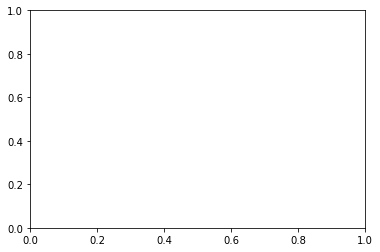

In [41]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Download the data from the URL
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()

# Create an empty DataFrame to store the data
df = pd.DataFrame(data)

# Question 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'].str[:4].astype(float) < 2000]

# Plot 1: Scatter plot of Earth meteorite coordinates
plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites (Before 2000)')
plt.show()

# Question 2: Get all the Earth meteorites coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[df['year'].str[:4].astype(float) < 1970]

# Plot 2: Scatter plot of Earth meteorite coordinates (Before 1970)
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites (Before 1970)')
plt.show()

# Question 3: Get all Earth meteorites with a mass greater than 10000 kg
earth_meteorites_mass_gt_10000kg = df[df['mass (g)'].notnull() & (df['mass (g)'].astype(float) > 10000)]

# Plot 3: Histogram of Earth meteorite mass
plt.hist(earth_meteorites_mass_gt_10000kg['mass (g)'].astype(float)/1000, bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Mass of Earth Meteorites (Mass > 10000 kg)')
plt.show()





Q.8.Use the Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations.Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

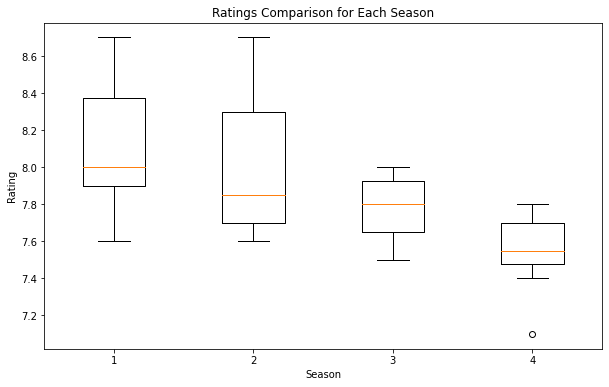

Ratings for Each Season:
Season 1: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7]
Season 2: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5]
Season 3: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7]
Season 4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]

Episode Names with Average Rating > 8:
["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Kiksuya', 'Vanishing Point', 'The Passenger']

Episode Names Aired Before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']

Episode Names with Highest and Lowest Rating:
Season 1: Highest - The Bicameral Mind, Lowest - The Stray
Season 2: Highest - Kiksuya, Lowest - Akane No Mai
Season 3: Highest - Parce Domine, Lowest - Decoherence
Seaso

In [43]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch data from the API
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract episode details
episode_details = []

for episode in data["_embedded"]["episodes"]:
    episode_details.append({
        "season": episode["season"],
        "name": episode["name"],
        "rating": episode["rating"]["average"],
        "airdate": episode["airdate"],
        "summary": episode["summary"]
    })

# Question 1: Ratings for each season
seasons = sorted(set(episode["season"] for episode in episode_details))
season_ratings = {season: [] for season in seasons}

for episode in episode_details:
    season_ratings[episode["season"]].append(episode["rating"])

# Plot 1: Ratings comparison for all seasons
plt.figure(figsize=(10, 6))
plt.boxplot(season_ratings.values(), labels=seasons)
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Ratings Comparison for Each Season')
plt.show()

# Question 2: Episode names with average rating > 8 for every season
highly_rated_episodes = [episode["name"] for episode in episode_details if episode["rating"] > 8]

# Question 3: Episode names aired before May 2019
episodes_before_may_2019 = [episode["name"] for episode in episode_details if episode["airdate"] < "2019-05-01"]

# Question 4: Episode names with highest and lowest rating in each season
highest_rated_episodes = []
lowest_rated_episodes = []

for season in seasons:
    season_episodes = [episode for episode in episode_details if episode["season"] == season]
    highest_rated_episode = max(season_episodes, key=lambda episode: episode["rating"])["name"]
    lowest_rated_episode = min(season_episodes, key=lambda episode: episode["rating"])["name"]
    highest_rated_episodes.append(highest_rated_episode)
    lowest_rated_episodes.append(lowest_rated_episode)

# Question 5: Summary of the most popular episode in each season
most_popular_episodes_summary = []

for season in seasons:
    season_episodes = [episode for episode in episode_details if episode["season"] == season]
    most_popular_episode = max(season_episodes, key=lambda episode: episode["rating"])
    most_popular_episodes_summary.append({
        "season": season,
        "episode_name": most_popular_episode["name"],
        "summary": most_popular_episode["summary"]
    })

# Print the results
print("Ratings for Each Season:")
for season, rating in zip(seasons, season_ratings.values()):
    print(f"Season {season}: {rating}")

print("\nEpisode Names with Average Rating > 8:")
print(highly_rated_episodes)

print("\nEpisode Names Aired Before May 2019:")
print(episodes_before_may_2019)

print("\nEpisode Names with Highest and Lowest Rating:")
for season, highest, lowest in zip(seasons, highest_rated_episodes, lowest_rated_episodes):
    print(f"Season {season}: Highest - {highest}, Lowest - {lowest}")

print("\nSummary of the Most Popular Episode in Each Season:")
for episode_summary in most_popular_episodes_summary:
    print(f"Season {episode_summary['season']}: {episode_summary['episode_name']}\n{episode_summary['summary']}")



Q.9.Write a program to read the data from the following link, perform data analysis and answer the following
questions.Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

Cars and Types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars with model year, model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []

Cars with electric range > 100 and made after 2015:
          Make  Electric Range
0        TESLA             238
2        TESLA             220
4        TESLA             210
12       TESLA             308
13       TESLA             322
...        ...             ...
130417   TESLA             291
130428  NISSAN             151
130432   TESLA             291
130436   TESLA             215
130441   TESLA             293

[34066 rows x 2 columns]


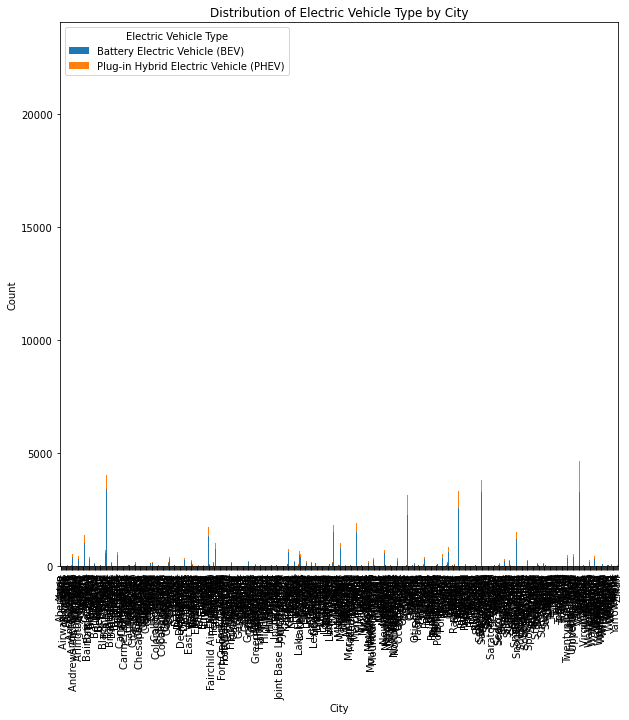

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Question 1: Cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "No"].loc[:, ["Make", "Model"]]
print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars)

# Question 2: TESLA cars with model year, model type made in Bothell City
tesla_cars_bothell = data[(data["Make"] == "TESLA") & (data["City"] == "BOTHELL")].loc[:, ["Model Year", "Model"]]
print("\nTESLA cars with model year, model type made in Bothell City:")
print(tesla_cars_bothell)

# Question 3: Cars with electric range > 100 and made after 2015
electric_cars = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)].loc[:, ["Make", "Electric Range"]]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars)

# Question 4: Plot distribution between city and electric vehicle type
city_ev_type_counts = data.groupby(["City", "Electric Vehicle Type"]).size().unstack().fillna(0)
city_ev_type_counts.plot(kind="bar", stacked=True, figsize=(10, 10))
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Type by City")
plt.legend(title="Electric Vehicle Type")
plt.show()






Q.10.Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same

In [59]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tag the words with their part-of-speech
    tagged_words = nltk.pos_tag(words)

    # Count the number of verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    for word, tag in tagged_words:
        if tag.startswith('V'):
            verb_count += 1
        elif tag.startswith('N'):
            noun_count += 1
        elif tag == 'PRP' or tag == 'PRP$':
            pronoun_count += 1
        elif tag.startswith('JJ'):
            adjective_count += 1

    # Create a dictionary to store the counts
    counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }

    return counts

# Test cases
text1 = "The cat jumped over the fence."
counts1 = count_pos_tags(text1)
print("Counts 1:", counts1)

text2 = "She is reading a book in the park."
counts2 = count_pos_tags(text2)
print("Counts 2:", counts2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


Counts 1: {'verbs': 1, 'nouns': 2, 'pronouns': 0, 'adjectives': 0}
Counts 2: {'verbs': 1, 'nouns': 2, 'pronouns': 0, 'adjectives': 0}


[nltk_data]   Unzipping corpora\stopwords.zip.
